# **_Visualization: is some Vector in the Column Space of some Matrix?_**

$$
\Huge
    \textsf{v}\in\textsf{\textit{C}(\textbf{M})}?
$$

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Description:_**

-   The goal: visualize the 2D column space of a three-dimensional matrix.

-   Plot both of a given matrix's ($\textsf{\textbf{M}}$) column vectors and the plane they span.

-   Also, we plot two different vectors: one is in $\textsf{\textbf{M}}$'s column space, the other is not.

-   Create an algorithm which creates a new, randomly generated vector which has a small chance of falling into $\textsf{\textbf{M}}$'s column space, and determine algebraically whether it's in $\textsf{\textbf{M}}$'s column space.

-   Make use of Matplotlib's 3D plotting capability and view the plot from several angles.

This Python Jupyter notebook extrapolates from an exercise in Mike X. Cohen's Linear Algebra course on Udemy.

-   Udemy course: https://www.udemy.com/course/linear-algebra-theory-and-implementation

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_anb:_**

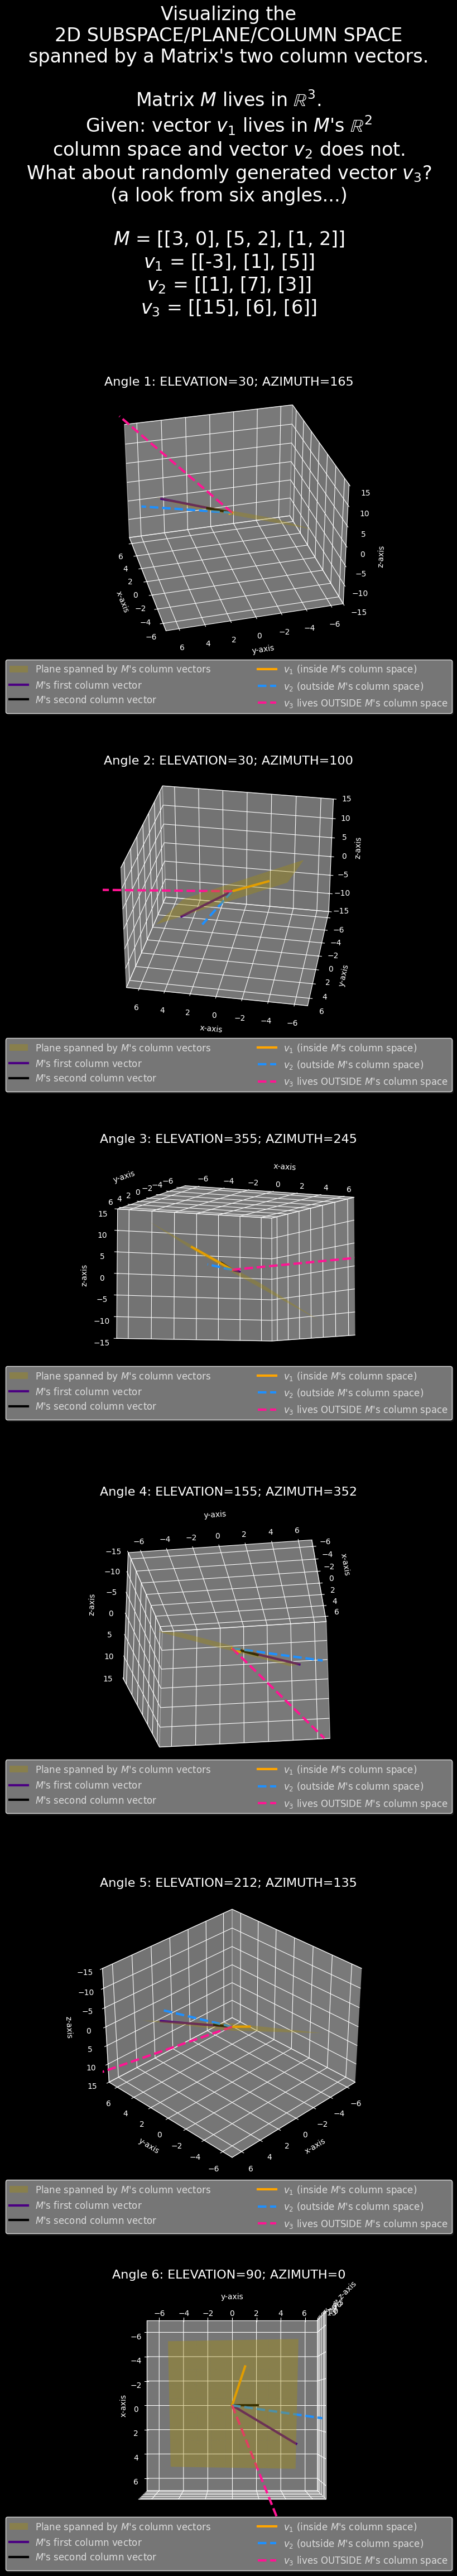

In [61]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np

# Matrix:
M = np.array([[3, 0], [5, 2], [1, 2]])

# Vector known to be in M's column space:
v_1 = np.array([[-3], [1], [5]])
# Vector known not to be in M's column space:
v_2 = np.array([[1], [7], [3]])

# # Create vector which could be inside OR
# #  outside of in M's column space:
# Copy M to prevent distorting original object:
M_COPY = np.copy(M)
# Choose a random column from M:
v_3 = M_COPY[:, np.random.randint(0, 2)]
# Replace one value, giving a one in five
#  chance of being in M's column space:
np.put(v_3, np.random.randint(0, 3), np.random.randint(0, 6))
# Make a column vector:
v_3 = v_3.reshape(3, 1)
# Scale vector by a random integer:
v_3 = v_3 * np.random.randint(1, 5)
# Stack v_3 on matrix M:
M_VAR = np.hstack((M, v_3))
# Check if rank is 2:
m_var_rank = np.linalg.matrix_rank(M_VAR)
# Indicate colors/labels based on in in R^2:
v_3_label = "$v_{3}$ lives OUTSIDE $M$'s column space"
v_3_color = "deeppink"
v_3_ls = "--"
if m_var_rank == 2:
    v_3_ls = "-"
    v_3_label = "$v_{3}$ lives INSIDE $M$'s column space"
    v_3_color = "lime"

# # Calculate plane values for plotting below:
# Set up the plane's Cartesian grid:
xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
# Compute the cross product for column vectors:
cp = np.cross(M[:, 0], M[:, 1])
# Compute normal vector, perpendicular to plane:
z1 = (-cp[0] * xx - cp[1] * yy) / cp[2]

# Various 3D rotations for variety of viewing the concept
#  to iterate for each subplot below:
el_az = {0: [30, 165], 1: [30, 100], 2: [355, 245], 3: [155, 352], 4: [212, 135], 5: [90, 0]}
# Rotated 3D axes require different placement of legend:
legend_vanchor = [-0.05, -0.05, 0.15, 0.09, -0.075, 0.09]
# More spacing stuff:
subtitle_sp = ["", "", "", "\n\n", "\n", ""]

# Use dark theme:
with plt.style.context("dark_background"):
    # Instantiate overall figure:
    fig = plt.figure()
    # Setup GridSpec's rows/col:
    gs = GridSpec(6, 1, figure=fig)

    # Define figures row axes for easy iteration:
    axes = [
        fig.add_subplot(gs[0], projection="3d"),
        fig.add_subplot(gs[1], projection="3d"),
        fig.add_subplot(gs[2], projection="3d"),
        fig.add_subplot(gs[3], projection="3d"),
        fig.add_subplot(gs[4], projection="3d"),
        fig.add_subplot(gs[5], projection="3d"),
    ]

    for i in range(len(axes)):
        # Plot the plane spanned by M's column vectors:
        plane_label = "Plane spanned by $M$'s column vectors"
        axes[i].plot_surface(xx, yy, z1, color="gold", alpha=0.35, label=plane_label)

        # # Plot matrix M's column vectors...
        axes[i].plot(
            [0, M[0, 0]],
            [0, M[1, 0]],
            [0, M[2, 0]],
            "-",
            c="indigo",
            lw=3,
            label="$M$'s first column vector",
        )
        axes[i].plot(
            [0, M[0, 1]],
            [0, M[1, 1]],
            [0, M[2, 1]],
            "-",
            c="k",
            lw=3,
            label="$M$'s second column vector",
        )

        # Plt v_1, v_2 and v_3:
        axes[i].plot(
            [0, v_1[0][0]],
            [0, v_1[1][0]],
            [0, v_1[2][0]],
            "orange",
            lw=3,
            label="$v_{1}$ (inside $M$'s column space)",
        )
        axes[i].plot(
            [0, v_2[0][0]],
            [0, v_2[1][0]],
            [0, v_2[2][0]],
            ls="--",
            color="dodgerblue",
            lw=3,
            label="$v_{2}$ (outside $M$'s column space)",
        )

        axes[i].plot(
            [0, v_3[0][0]],
            [0, v_3[1][0]],
            [0, v_3[2][0]],
            ls=v_3_ls,
            color=v_3_color,
            lw=3,
            label=v_3_label,
        )

        axes[i].view_init(elev=el_az[i][0], azim=el_az[i][1])

        # Format and place the legend below the subplot:
        axes[i].legend(
            loc="upper center",
            bbox_to_anchor=(0.5, legend_vanchor[i]),
            fancybox=True,
            shadow=True,
            facecolor="#767676",
            labelcolor="gainsboro",
            edgecolor="gainsboro",
            columnspacing=5.0,
            ncol=2,
            fontsize=12,
        )

        # Build subplot title and description:
        ax_title = f"\n\n\n\nAngle {i + 1}: "
        ax_title += f"ELEVATION={el_az[i][0]}; AZIMUTH={el_az[i][1]}{subtitle_sp[i]}"
        axes[i].set_title(ax_title, size=16)

        # Label subplot axes, expand range slightly:
        axes[i].set(
            xlim=(-7, 7),
            ylim=(-7, 7),
            zlim=(-15, 15),
            xlabel="x-axis",
            ylabel=("y-axis"),
            zlabel=("z-axis"),
        )

        # Fine-tune subplot size:
        axes[i].set_box_aspect(None, zoom=1.1)

    # Build and implement figure title with latex, relevant values:
    # sup_title = (
    #     "Given matrix $M$ in $\\mathbb{R}^3$, are vectors $v_{1}$ and $v_{2}$ in the"
    # )
    sup_title = "Visualizing the\n2D SUBSPACE/PLANE/COLUMN SPACE"
    sup_title += "\nspanned by a Matrix's two column vectors."
    sup_title += "\n\nMatrix $M$ lives in $\\mathbb{R}^3$."
    sup_title += "\nGiven: vector $v_{1}$ lives in $M$'s $\\mathbb{R}^2$"
    sup_title += "\ncolumn space and vector $v_{2}$ does not."
    sup_title += "\nWhat about randomly generated vector $v_{3}$?"
    sup_title += "\n(a look from six angles...)"
    sup_title += "\n\n$M$ = %s" % M.tolist()
    sup_title += "\n$v_{1}$ = %s" % v_1.tolist()
    sup_title += "\n$v_{2}$ = %s" % v_2.tolist()
    sup_title += "\n$v_{3}$ = %s\n\n" % v_3.tolist()
    plt.suptitle(sup_title, size=24)

    # Set figure size at this point in the process:
    plt.gcf().set_size_inches(9, 47)
    # Make room:
    plt.tight_layout()
    # Make a little more room:
    fig.subplots_adjust(hspace=0.5)
    # Execute:
    plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<div style="border: 3px groove crimson; border-radius: 5px; width: fit-content; text-align: center; padding: 0.35em 0.75em;">
  <span style="font-size: 15px; font-weight: bold; color: crimson;">
    CONCLUSIONS
  </span>
</div>

<div style="border: 3px groove mediumaquamarine; border-radius: 5px; width: fit-content; text-align: center; padding: 0.35em 0.75em;">
  <span style="font-size: 15px; font-weight: bold; color: mediumaquamarine;">
    CORRESPONDENCE
  </span>
</div>


<div style="border: 3px groove gold; border-radius: 5px; width: fit-content; text-align: center; padding: 0.35em 0.75em;">
  <span style="font-size: 15px; font-weight: bold; color: gold;">
    RESUME 00:00
  </span>
</div>